In [6]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 5.4 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 6.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 7.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 6.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 5.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 3.7 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install -U scikit-learn scipy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 6.5 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 6.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
from tqdm import tqdm

In [2]:
from tensorflow.keras import backend as K

# KNN (8 classes)

In [8]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
from tqdm import tqdm

train_dir = '/Users/anishvirkhare/Downloads/8_classes_train' 

IMG_SIZE = (128, 128)  

def load_images_and_labels(data_dir, img_size=(128, 128)):
    images = []
    labels = []
    classes = os.listdir(data_dir)
    
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        for img_name in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):

            if img_name == ".DS_Store":
                continue

            img_path = os.path.join(class_path, img_name)
            try:
                # Load and resize image
                img = Image.open(img_path).convert("RGB")
                img = img.resize(img_size)
                images.append(np.array(img).flatten()) 
                labels.append(class_name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels)

X_train, y_train = load_images_and_labels(train_dir, IMG_SIZE)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train_scaled, y_train_encoded)

Processing Seborrheic Keratoses and other Benign Tumors: 100%|█| 1371/1371 [00:0
Processing Eczema Photos: 100%|████████████| 1235/1235 [00:04<00:00, 286.43it/s]
Processing Psoriasis pictures Lichen Planus and related diseases: 100%|█| 1405/1
Processing Nail Fungus and other Nail Disease: 100%|█| 1040/1040 [00:03<00:00, 2
Processing Tinea Ringworm Candidiasis and other Fungal Infections: 100%|█| 1300/
Processing Warts Molluscum and other Viral Infections: 100%|█| 1086/1086 [00:03<
Processing Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 1


KNeighborsClassifier()

### KNN test

In [9]:
y_train_pred = knn_model.predict(X_train_scaled)

accuracy = accuracy_score(y_train_encoded, y_train_pred)
print(f"Training Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_))

Training Accuracy: 0.5479
Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.42      0.72      0.53       840
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.56      0.48      0.52      1149
                                                     Eczema Photos       0.52      0.64      0.57      1235
                                Nail Fungus and other Nail Disease       0.79      0.61      0.69      1040
             Psoriasis pictures Lichen Planus and related diseases       0.54      0.47      0.51      1405
                      Seborrheic Keratoses and other Benign Tumors       0.55      0.62      0.58      1371
            Tinea Ringworm Candidiasis and other Fungal Infections       0.64      0.43      0.51      1299
                        Warts Molluscum and other Viral Infections       0.49      0.4

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.40      0.62      0.49       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.24      0.16      0.19       288
                                                     Eczema Photos       0.32      0.40      0.36       309
                                Nail Fungus and other Nail Disease       0.64      0.45      0.53       261
             Psoriasis pictures Lichen Planus and related diseases       0.26      0.24      0.25       352
                      Seborrheic Keratoses and other Benign Tumors       0.32      0.42      0.36       343
            Tinea Ringworm Candidiasis and other Fungal Infections       0.34      0.18      0.24       325
                        Warts Molluscum and other Viral Infections       0.22      0.24      0.23       272

   

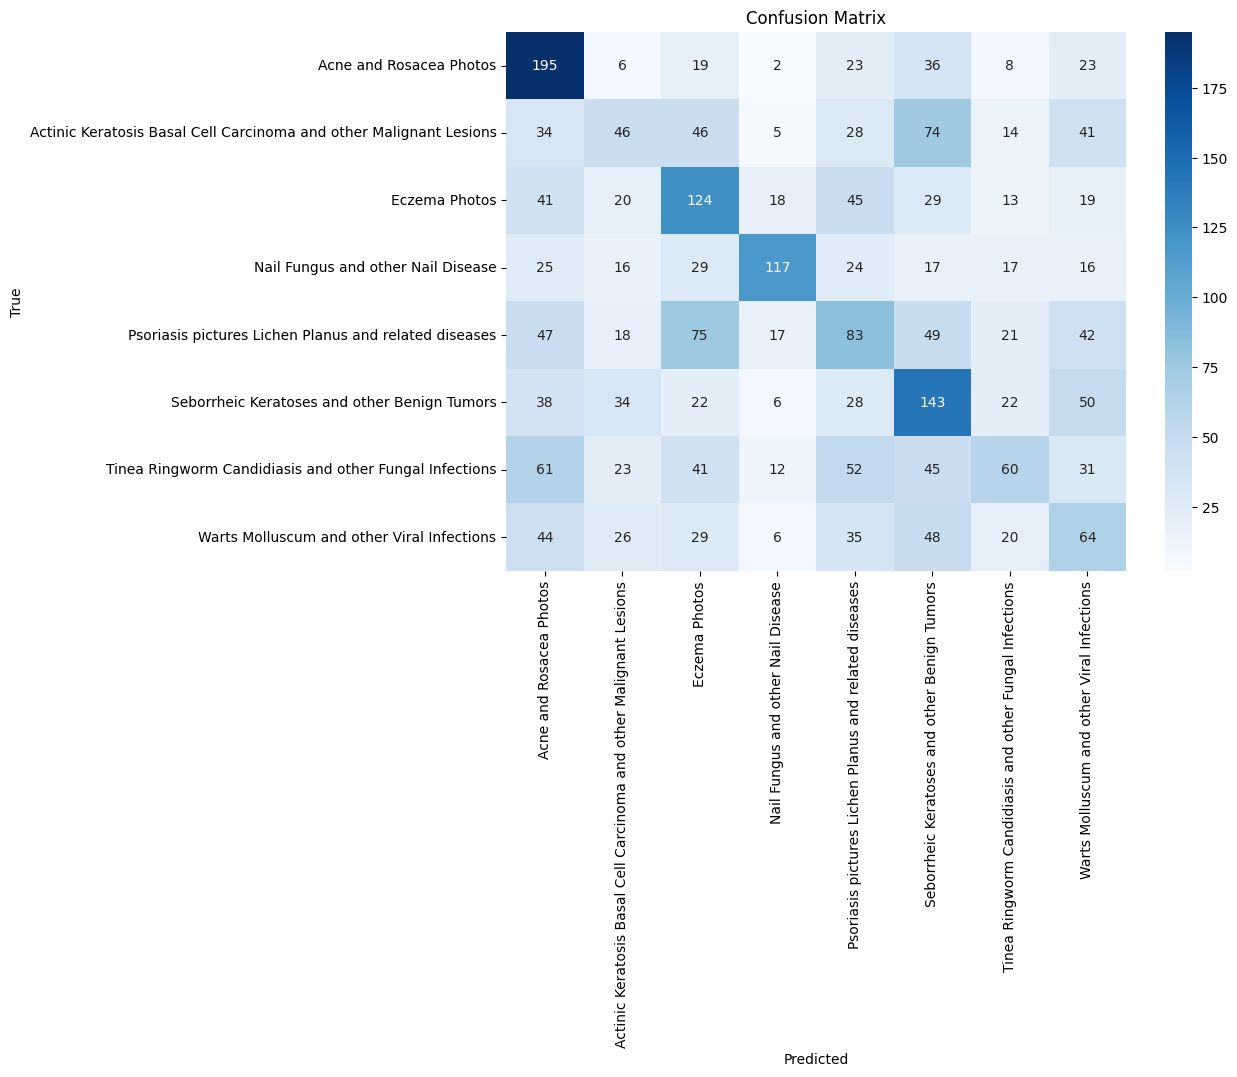

In [16]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns

test_dir = '/Users/anishvirkhare/Downloads/8_classes_test' 
train_dir = '/Users/anishvirkhare/Downloads/8_classes_train' 

def load_images_and_labels(data_dir, img_size=(128, 128)):
    images = []
    labels = []
    classes = os.listdir(data_dir)

    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        for img_name in os.listdir(class_path):
            if img_name == ".DS_Store": 
                continue
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize(img_size)
                images.append(np.array(img).flatten()) 
                labels.append(class_name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels)

X_train, y_train = load_images_and_labels(train_dir)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

img_size = (128, 128)  
X_test, y_test = load_images_and_labels(test_dir, img_size)

y_test_encoded = label_encoder.transform(y_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

y_pred_encoded = knn_model.predict(X_test_scaled)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### KNN (best classes)

In [6]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
from tqdm import tqdm

train_dir = '/Users/anishvirkhare/Downloads/best_classes_train'  

IMG_SIZE = (128, 128)  

def load_images_and_labels(data_dir, img_size=(128, 128)):
    images = []
    labels = []
    classes = os.listdir(data_dir)
    
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        for img_name in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):

            if img_name == ".DS_Store":
                continue

            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize(img_size)
                images.append(np.array(img).flatten())  # Flatten image for KNN input
                labels.append(class_name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels)

X_train, y_train = load_images_and_labels(train_dir, IMG_SIZE)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

knn_model_2 = KNeighborsClassifier(n_neighbors=5) 
knn_model_2.fit(X_train_scaled, y_train_encoded)

y_train_pred = knn_model_2.predict(X_train_scaled)

accuracy = accuracy_score(y_train_encoded, y_train_pred)
print(f"Training Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_))

Processing Vascular Tumors: 100%|████████████| 482/482 [00:01<00:00, 280.02it/s]
Processing Exanthems and Drug Eruptions: 100%|█| 404/404 [00:01<00:00, 282.00it/
Processing Nail Fungus and other Nail Disease: 100%|█| 1040/1040 [00:03<00:00, 3
Processing Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 1
Processing Melanoma Skin Cancer Nevi and Moles: 100%|█| 463/463 [00:01<00:00, 28


Training Accuracy: 0.6035
Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.47      0.84      0.61       840
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.60      0.63      0.62      1149
                                      Exanthems and Drug Eruptions       0.67      0.40      0.50       404
                               Melanoma Skin Cancer Nevi and Moles       0.55      0.59      0.56       463
                                Nail Fungus and other Nail Disease       0.85      0.65      0.74      1040
                                                   Vascular Tumors       0.66      0.20      0.30       482

                                                          accuracy                           0.60      4378
                                                         macro avg       0.63      0.

Classification Report:
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.50      0.79      0.61       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.41      0.43      0.42       288
                                      Exanthems and Drug Eruptions       0.38      0.20      0.26       101
                               Melanoma Skin Cancer Nevi and Moles       0.37      0.46      0.41       116
                                Nail Fungus and other Nail Disease       0.80      0.54      0.64       261
                                                   Vascular Tumors       0.27      0.07      0.11       121

                                                          accuracy                           0.49      1199
                                                         macro avg       0.45      0.41      0.41      1199
   

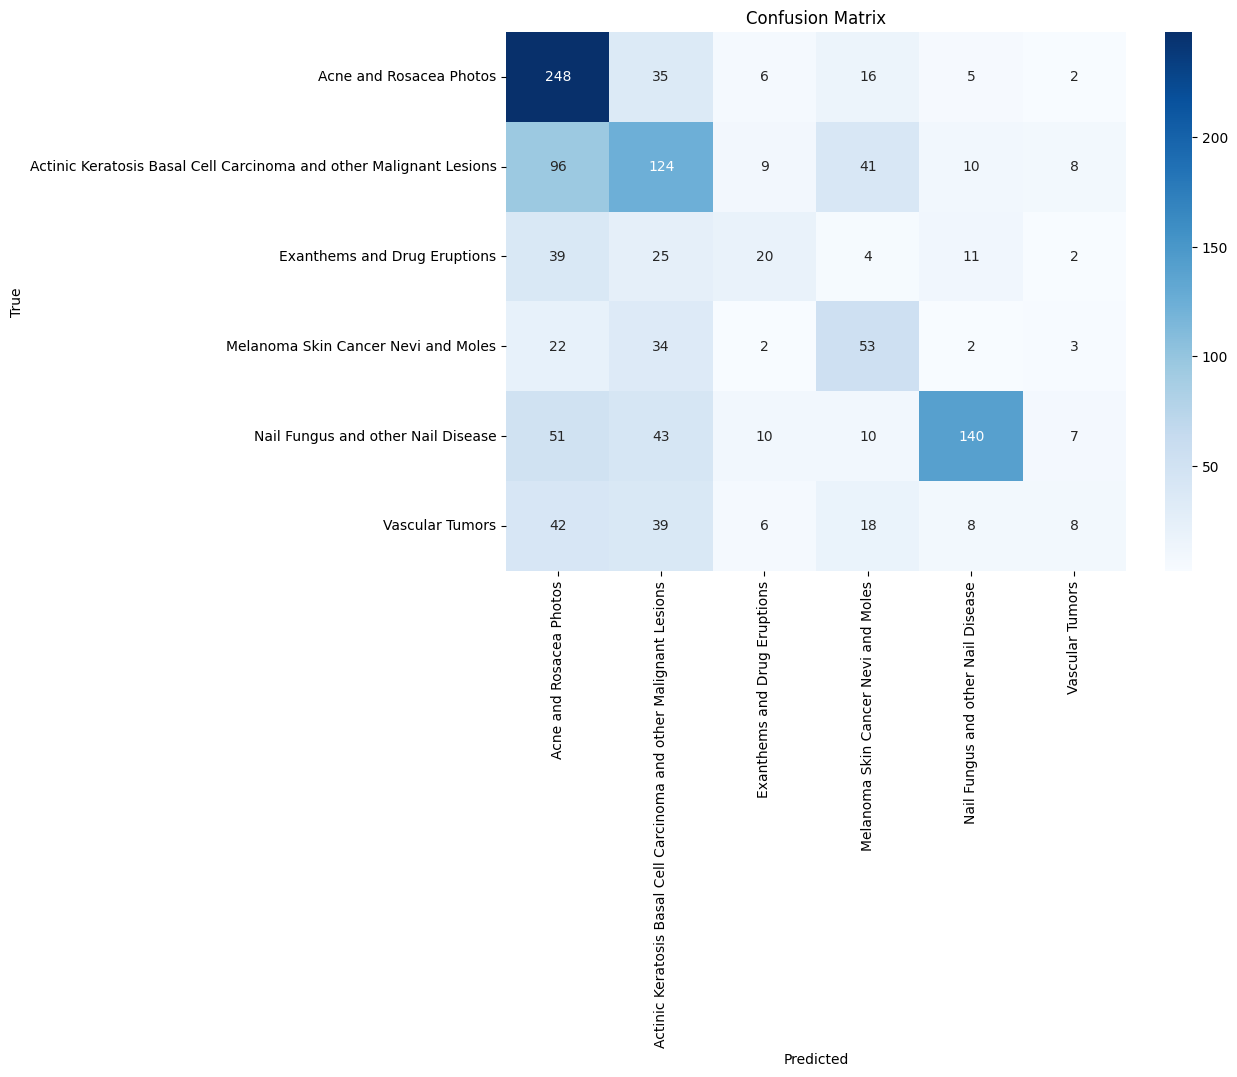

In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns

test_dir = '/Users/anishvirkhare/Downloads/best_classes_test'
train_dir = '/Users/anishvirkhare/Downloads/best_classes_train' 

def load_images_and_labels(data_dir, img_size=(128, 128)):
    images = []
    labels = []
    classes = os.listdir(data_dir)

    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        for img_name in os.listdir(class_path):
            if img_name == ".DS_Store":  
                continue
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize(img_size)
                images.append(np.array(img).flatten())  
                labels.append(class_name)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels)

X_train, y_train = load_images_and_labels(train_dir)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# test data
img_size = (128, 128) 
X_test, y_test = load_images_and_labels(test_dir, img_size)

y_test_encoded = label_encoder.transform(y_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

y_pred_encoded = knn_model_2.predict(X_test_scaled)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# ResNet50

In [39]:
import os
import shutil
from sklearn.model_selection import train_test_split

original_train_dir = '/Users/anishvirkhare/Downloads/archive/train'  

new_train_dir = '/Users/anishvirkhare/Downloads/train_split/train' 
validation_dir = '/Users/anishvirkhare/Downloads/train_split/validation' 

validation_split = 0.2 

os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

for class_folder in os.listdir(original_train_dir):
    class_path = os.path.join(original_train_dir, class_folder)
    if not os.path.isdir(class_path):
        continue 

    files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    train_files, val_files = train_test_split(files, test_size=validation_split, random_state=42)

    train_class_dir = os.path.join(new_train_dir, class_folder)
    val_class_dir = os.path.join(validation_dir, class_folder)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    for file in train_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(train_class_dir, file))

    for file in val_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(val_class_dir, file))

print("Train and validation data split completed.")
print(f"New train directory: {new_train_dir}")
print(f"Validation directory: {validation_dir}")


Train and validation data split completed.
New train directory: /Users/anishvirkhare/Downloads/train_split/train
Validation directory: /Users/anishvirkhare/Downloads/train_split/validation


In [101]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/Users/anishvirkhare/Downloads/train_split/train'
val_dir = '/Users/anishvirkhare/Downloads/train_split/validation'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255) 
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    shuffle=True  
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False 
)

print(f"Training batches: {len(train_generator)}")
print(f"Validation batches: {len(val_generator)}")

Found 12590 images belonging to 23 classes.
Found 3271 images belonging to 23 classes.
Training batches: 394
Validation batches: 103


In [106]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/Users/anishvirkhare/Downloads/train_split/train'
val_dir = '/Users/anishvirkhare/Downloads/train_split/validation'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 23

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# Unfreeze all layers
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train 
history_fine_tune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS // 2
)


Found 12590 images belonging to 23 classes.
Found 3271 images belonging to 23 classes.
Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 575s 1s/step - accuracy: 0.0857 - loss: 3.0753 - val_accuracy: 0.1263 - val_loss: 2.9497
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 678s 2s/step - accuracy: 0.0988 - loss: 2.9620 - val_accuracy: 0.1272 - val_loss: 2.9223
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 724s 2s/step - accuracy: 0.1039 - loss: 2.9541 - val_accuracy: 0.1046 - val_loss: 2.9202
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 645s 2s/step - accuracy: 0.1124 - loss: 2.9336 - val_accuracy: 0.1162 - val_loss: 2.9174
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 639s 2s/step - accuracy: 0.1122 - loss: 2.9274 - val_accuracy: 0.1428 - val_loss: 2.8881
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 658s 2s/step - accuracy: 0.1148 - loss: 2.9140 - val_accuracy: 0.1217 - val_loss: 2.8876
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 9430s 24s/step - accuracy: 0.1167 - loss: 2.8970 - val_accuracy: 0.1082 - val_loss: 2.8850
Epoch 8/

OSError: [Errno 30] Read-only file system: '/path_to'

In [128]:
# Save final model
model.save("/Users/anishvirkhare/Downloads/final_resnet50_model.h5")
print("Model saved successfully.")

### Testing ResNet50

In [153]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/Users/anishvirkhare/Downloads/archive/test'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  
    shuffle=False  
)

Found 4002 images belonging to 23 classes.


In [155]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.load_model("/Users/anishvirkhare/Downloads/final_resnet50_model.h5")

results = model.evaluate(test_generator)
test_loss, test_accuracy = results[0], results[1] 
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

conf_matrix = confusion_matrix(true_classes, predicted_classes)

print("\nConfusion Matrix:")
print(conf_matrix)

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("\nClassification Report:")
print(report)

Found 4002 images belonging to 23 classes.


126/126 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.4540 - loss: 2.3142
Test Accuracy: 44.70%
126/126 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step

Confusion Matrix:
[[221   1   1   1   5   2   1   1   4   4   2   0   3   1   8   3   8   2
   17   0   1   1  25]
 [  3  66   4   1   5  16   1   3   8   4   6   4  11   3   9   5  68  14
   14   6   2   8  27]
 [  5   1  39   0   1  17   2   1   0   3   1   0   2   1   2   1   6   2
    7  14   0   4  14]
 [  3   1   2  14   2   8   0   1   3   2   2   0   6   3   5   2  11   3
   17   0   1   7  20]
 [  3   1   1   0  19   7   0   1   3   0   2   0   3   0   1   0   5   3
   10   0   1   2  11]
 [  0   0  12   2   4 154   2   2   4   4   1   0  19   3  22   2  10   5
   33   5   0   5  20]
 [  1   0   9   0   1   2  30   0   1   1   1   0   2   1   6   0   3   1
   12  15   0   6   9]
 [  0   0   0   0   0   0   0  41   1   0   0   0   7   0   1   0   0   1
    8   0   0   0   1]
 [  0   0   0   0   0   3   0   2  44   1   0   1   5   1   3   0

# CNN (best classes) 

In [159]:
import os
import shutil

data_dir = "/Users/anishvirkhare/Downloads/archive/train" 
output_dir = "/Users/anishvirkhare/Downloads/best_classes_train"

# Specifying the classes 
allowed_classes = ["Acne and Rosacea Photos",
                   "Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions", 
                   "Exanthems and Drug Eruptions",
                   "Melanoma Skin Cancer Nevi and Moles",
                   "Nail Fungus and other Nail Disease",
                   "Vascular Tumors", 
                  ]

os.makedirs(output_dir, exist_ok=True)

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        if class_name in allowed_classes:
            
            dest_class_path = os.path.join(output_dir, class_name)
            shutil.copytree(class_path, dest_class_path)
            print(f"Class '{class_name}' retained.")
        else:
            print(f"Class '{class_name}' removed (not in allowed classes).")

print("Filtered training data saved to:", output_dir)


Class 'Urticaria Hives' removed (not in allowed classes).
Class 'Seborrheic Keratoses and other Benign Tumors' removed (not in allowed classes).
Class 'Poison Ivy Photos and other Contact Dermatitis' removed (not in allowed classes).
Class 'Acne and Rosacea Photos' retained.
Class 'Vascular Tumors' retained.
Class 'Eczema Photos' removed (not in allowed classes).
Class 'Psoriasis pictures Lichen Planus and related diseases' removed (not in allowed classes).
Class 'Exanthems and Drug Eruptions' retained.
Class 'Lupus and other Connective Tissue diseases' removed (not in allowed classes).
Class 'Scabies Lyme Disease and other Infestations and Bites' removed (not in allowed classes).
Class 'Bullous Disease Photos' removed (not in allowed classes).
Class 'Nail Fungus and other Nail Disease' retained.
Class 'Tinea Ringworm Candidiasis and other Fungal Infections' removed (not in allowed classes).
Class 'Systemic Disease' removed (not in allowed classes).
Class 'Light Diseases and Disorders 

In [160]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

train_dir = '/Users/anishvirkhare/Downloads/best_classes_train'  

IMG_SIZE = (224, 224)  
BATCH_SIZE = 32        
NUM_CLASSES = 6       
EPOCHS = 20            

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255, 
    validation_split=0.1 
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training', 
    shuffle=True    
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation', 
    shuffle=False      
)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), 
    layers.Dense(NUM_CLASSES, activation='softmax') 
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Found 3942 images belonging to 6 classes.
Found 436 images belonging to 6 classes.


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 73s 582ms/step - accuracy: 0.3244 - loss: 1.8574 - val_accuracy: 0.3486 - val_loss: 1.5515
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 81s 650ms/step - accuracy: 0.4472 - loss: 1.4576 - val_accuracy: 0.3463 - val_loss: 1.5913
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 81s 656ms/step - accuracy: 0.5158 - loss: 1.2858 - val_accuracy: 0.2844 - val_loss: 1.7406
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 84s 676ms/step - accuracy: 0.5475 - loss: 1.2084 - val_accuracy: 0.3417 - val_loss: 1.5657
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 85s 681ms/step - accuracy: 0.6060 - loss: 1.0401 - val_accuracy: 0.3739 - val_loss: 1.6714
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 85s 685ms/step - accuracy: 0.6546 - loss: 0.9170 - val_accuracy: 0.4128 - val_loss: 1.6653
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 86s 695ms/step - accuracy: 0.7078 - loss: 0.7839 - val_accuracy: 0.4083 - val_loss: 1.7165
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 88s 709ms/step - accuracy: 0.7457 - loss: 0

OSError: [Errno 30] Read-only file system: '/path'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

test_dir = '/Users/anishvirkhare/Downloads/best_classes_test'  
saved_model_path = '/Users/anishvirkhare/Downloads/CNN_best_classes.h5'

model = load_model(saved_model_path)

IMG_SIZE = (224, 224)
BATCH_SIZE = 32 

test_datagen = ImageDataGenerator(rescale=1.0 / 255) 

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,     
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    shuffle=False            
)

loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

predictions = model.predict(test_generator)

predicted_classes = predictions.argmax(axis=-1)

actual_classes = test_generator.classes

print("\nClassification Report:\n")
print(classification_report(actual_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

accuracy = accuracy_score(actual_classes, predicted_classes)
precision = precision_score(actual_classes, predicted_classes, average='weighted')
recall = recall_score(actual_classes, predicted_classes, average='weighted')
f1 = f1_score(actual_classes, predicted_classes, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Found 1199 images belonging to 6 classes.


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.7714 - loss: 1.4244
Test Loss: 2.3039, Test Accuracy: 0.6564
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step

Classification Report:

                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.71      0.91      0.80       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.56      0.62      0.59       288
                                      Exanthems and Drug Eruptions       0.60      0.50      0.54       101
                               Melanoma Skin Cancer Nevi and Moles       0.53      0.43      0.48       116
                                Nail Fungus and other Nail Disease       0.81      0.74      0.77       261
                                                   Vascular Tumors       0.47      0.24      0.32       121

                                                          ac

# CNN test with Lime

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Class: Nail Fungus and other Nail Disease (Index: 4)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

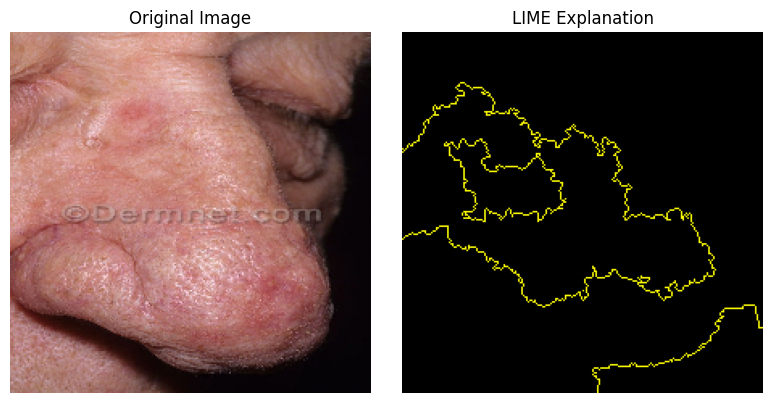

In [28]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from lime import lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

image_path = '/Users/anishvirkhare/Downloads/best_classes_test/Acne and Rosacea Photos/rosacea-nose-40.jpg'  
saved_model_path = '/Users/anishvirkhare/Downloads/CNN_best_classes.h5'

model = load_model(saved_model_path)

IMG_SIZE = (224, 224)

def preprocess_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0  # Rescale to [0, 1]
    return np.expand_dims(img_array, axis=0), img_to_array(img)  # Return original image as NumPy array

input_image, original_image = preprocess_image(image_path)

predictions = model.predict(input_image)
predicted_class = predictions.argmax(axis=-1)[0]

class_labels = list(test_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_label} (Index: {predicted_class})")

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    input_image[0],  # Input image
    model.predict,   # Model prediction function
    top_labels=5,    # Number of top labels to explain
    hide_color=0,    # Pixel value for hidden superpixels
    num_samples=1000 # Number of samples for perturbations
)

# Get explanation for the predicted class
temp, mask = explanation.get_image_and_mask(
    predicted_class,
    positive_only=True,
    num_features=10,
    hide_rest=False
)

# Display the original image and LIME explanation
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image / 255.0)  # Original image normalized
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("LIME Explanation")
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.axis('off')

plt.tight_layout()
plt.show()

# ResNet50 (best classes)

In [20]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

train_dir = '/Users/anishvirkhare/Downloads/best_classes_train'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 6
EPOCHS = 20

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

base_model = tf.keras.applications.ResNet50(
    weights=None,
    include_top=False,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

model.save('/Users/anishvirkhare/Downloads/CNN_best_classes')

Found 3942 images belonging to 6 classes.
Found 436 images belonging to 6 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,878 (93.99 MB)

 Trainable params: 1,052,166 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.2486 - loss: 1.7411 - val_accuracy: 0.2615 - val_loss: 1.7168
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.2620 - loss: 1.7056 - val_accuracy: 0.2615 - val_loss: 1.7171
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.2769 - loss: 1.6991 - val_accuracy: 0.2844 - val_loss: 1.7128
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.2798 - loss: 1.7150 - val_accuracy: 0.3532 - val_loss: 1.7120
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3714s 30s/step - accuracy: 0.2947 - loss: 1.6907 - val_accuracy: 0.3119 - val_loss: 1.7036
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3256s 26s/step - accuracy: 0.3264 - loss: 1.6879 - val_accuracy: 0.3509 - val_loss: 1.6924
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 3746s 30s/step - accuracy: 0.3371 - loss: 1.6743 - val_accuracy: 0.3647 - val_loss: 1.6781
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4875s 40s/step - accuracy: 0.3522 - loss: 1.6709 - 

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/Users/anishvirkhare/Downloads/CNN_best_classes.

### resnet50 best classes test

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report

test_dir = '/Users/anishvirkhare/Downloads/best_classes_test'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=-1)

actual_classes = test_generator.classes

print(classification_report(actual_classes, predicted_classes, target_names=test_generator.class_indices.keys()))


Found 1199 images belonging to 6 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.2300 - loss: 1.5354
Test Loss: 1.5509, Test Accuracy: 0.3561
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.00      0.00      0.00       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.33      0.75      0.46       288
                                      Exanthems and Drug Eruptions       0.00      0.00      0.00       101
                               Melanoma Skin Cancer Nevi and Moles       0.00      0.00      0.00       116
                                Nail Fungus and other Nail Disease       0.38      0.81      0.52       261
                                                   Vascular Tumors       0.00      0.00      0.00       121

                                               

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf